In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier


In [27]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
df = df.drop(["PassengerId","Name","SibSp","Parch","Cabin","Embarked"],axis = 1)

In [30]:
df

,Survived,Pclass,Sex,Age,Ticket,Fare
0,0,3,male,34.5,330911,7.8292
1,1,3,female,47.0,363272,7.0000
2,0,2,male,62.0,240276,9.6875
3,0,3,male,27.0,315154,8.6625
4,1,3,female,22.0,3101298,12.2875
...,...,...,...,...,...,...
413,0,3,male,NaN,A.5. 3236,8.0500
414,1,1,female,39.0,PC 17758,108.9000
415,0,3,male,38.5,SOTON/O.Q. 3101262,7.2500
416,0,3,male,NaN,359309,8.0500


In [42]:
df.isnull().sum()


Index(['Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare'], dtype='object')

In [44]:
le = LabelEncoder()
cols = list(df.columns)
for col in cols:
    df[col] = le.fit_transform(df[col])
df.dtypes


Survived    int64
Pclass      int64
Sex         int64
Age         int64
Ticket      int64
Fare        int64
dtype: object

In [21]:
from sklearn.impute import SimpleImputer

In [45]:
# si = SimpleImputer(strategy = 'mean')
# df = si.fit_transform(df)


In [66]:
df.dtypes
df = df.fillna(df.mean())
df.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
Ticket      0
Fare        0
dtype: int64

In [67]:
# df.dropna(inplace = True)

In [68]:
df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare
0,0,2,1,44,128,20
1,1,2,0,60,181,4
2,0,1,1,73,63,34
3,0,2,1,34,124,28
4,1,2,0,27,115,38


In [69]:
X = df.drop("Survived",axis =1 )
Y = df['Survived']

In [70]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state= 42)

In [71]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [73]:
model = DecisionTreeClassifier()

In [75]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [76]:
y_pred = model.predict(X_test)

In [80]:
acc = accuracy_score(y_pred,Y_test)
acc

1.0

In [81]:
cm = confusion_matrix(y_pred,Y_test)

In [83]:
cm
classes = ["Survived","not Survived"]

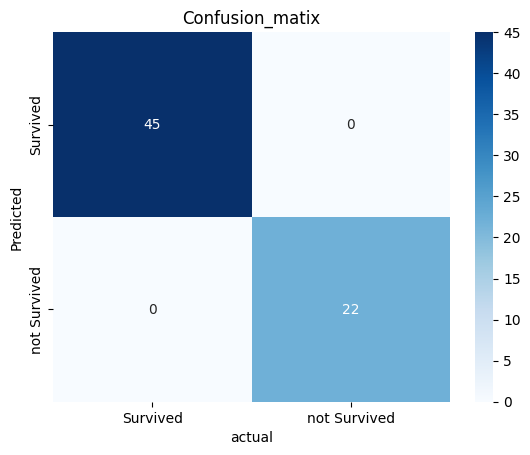

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot = True,cmap = 'Blues',fmt = 'd',xticklabels= classes,yticklabels = classes)
plt.title("Confusion_matix")
plt.xlabel("actual")
plt.ylabel("Predicted")
plt.show()

[Text(0.5, 0.75, 'Pclass <= -0.209\ngini = 0.479\nsamples = 264\nvalue = [159, 105]\nclass = Survived'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 105\nvalue = [0, 105]\nclass = not Survived'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 159\nvalue = [159, 0]\nclass = Survived')]

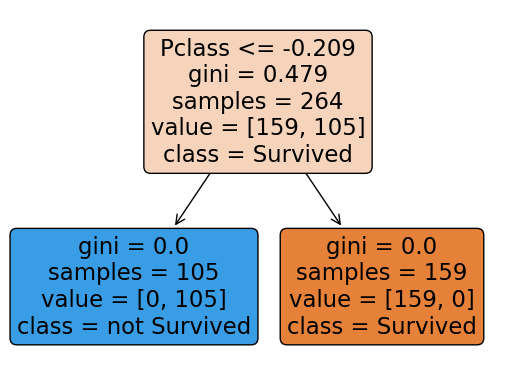

In [90]:
from sklearn.tree import plot_tree
# plt.figure(figsize = (10,6))
plt.title("Decision_tree")
plot_tree(model,filled = True,feature_names = list(df.columns),class_names = classes,rounded = True)

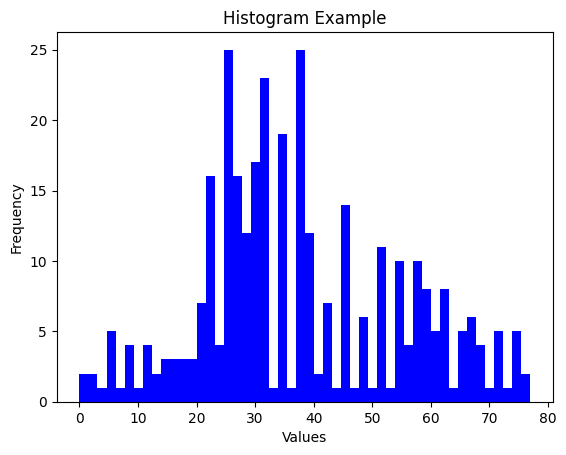

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# # Sample data
# data = np.random.randn(1000)

# Histogram
plt.hist(df['Age'], bins=50, color='blue')
plt.title('Histogram Example')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


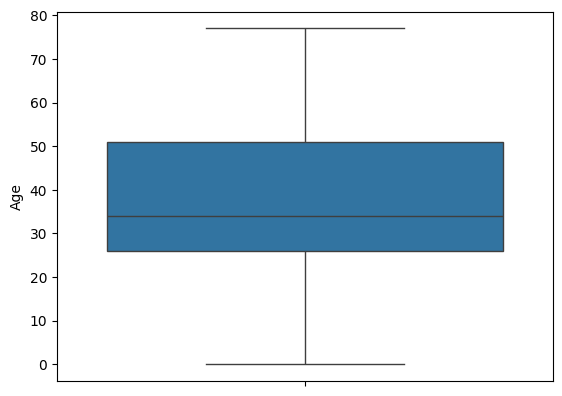

In [99]:
sns.boxplot(df['Age'])
plt.show()

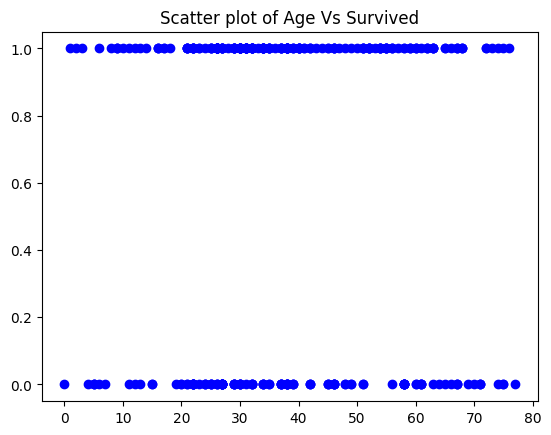

In [102]:
plt.scatter(x = df['Age'],y = df['Sex'],color = 'Blue',marker = 'o')
plt.title("Scatter plot of Age Vs Survived")
plt.show()